#Name: Dylan James N. Dejoras <br>
#Section: CPE22S3

source: https://archive.ics.uci.edu/dataset/20/census+income

## Setup

In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np

from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
print(census_income.metadata)

# variable information
print(census_income.variables)


{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [ ]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [ ]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


We concatenate the two dataframes

In [ ]:
dataFrames = [X,y]
df = pd.concat(dataFrames, axis = 1)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


We check the datatypes of the columns.

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

After checking the datatypes, we attempt to change some of them to the preferred datatypes.

This copying of dataframe is for the purpose of having separate dataframes with different datatypes

In [ ]:
census_df = df.copy()

Check null values

In [ ]:
census_df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

function for checking duplicates...

In [ ]:
def check_duplicates(df):
  if df[df.duplicated()].shape[0] != 0:
    print(df[df.duplicated()].shape[0])
  else:
    print("No existing duplicates")
check_duplicates(census_df)

29


## We use .info() to check if there are null values, three columns could does not meet the total value of 48842 meaning they have null values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


drop duplicates for both dataframes

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
census_df.drop_duplicates(inplace=True)

In [ ]:
df.rename(columns={'native-country': 'native_country'}, inplace=True) # rename column

code block for removing the null values

In [ ]:
df.workclass.replace('?', 'Private', inplace = True)
df.workclass.fillna('Private', inplace = True)
df.occupation.replace('?', 'Prof-specialty', inplace = True)
df.occupation.fillna('Prof-specialty', inplace = True)
df.native_country.replace('?', 'United-States', inplace = True)
df.native_country.fillna('United-States', inplace = True)

In [ ]:
census_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

this copying of dataframe will enable me to recycle the dataframe in which the datatypes don't have all numerical values

In [ ]:
category_df = df.copy()

Let's create a function for checking value counts of a column in a certain dataframe for the three columns with duplicates

In [ ]:
def check_value_counts(column):
  print(df.value_counts(column))

In [ ]:
check_value_counts(census_df['workclass'])

workclass
Private             33879
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [ ]:
check_value_counts(census_df['occupation'])

occupation
Prof-specialty       6167
Craft-repair         6107
Exec-managerial      6084
Adm-clerical         5608
Sales                5504
Other-service        4919
Machine-op-inspct    3019
Transport-moving     2355
Handlers-cleaners    2071
?                    1843
Farming-fishing      1487
Tech-support         1445
Protective-serv       983
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64


In [ ]:
check_value_counts(census_df['native-country'])

native-country
United-States                 43810
Mexico                          947
?                               582
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

convert to list before changing it to numeric datatype1

In [ ]:
workclass_type = list(census_df['workclass'].unique())
education_type = list(census_df['education'].unique())
marital_status_type = list(census_df['marital-status'].unique())
occupation_type = list(census_df['occupation'].unique())
relationship_type = list(census_df['relationship'].unique())
race_type = list(census_df['race'].unique())
sex_type = list(census_df['sex'].unique())
native_country_type = list(census_df['native-country'].unique())
income_type = list(census_df['income'].unique())

using .apply and lambda for enabling the categorical datatypes to have a numerical value

In [ ]:
# in this case, we use the categorical columns, we apply lambda to the dataframes in which we get their indices using the x variable and .index()
census_df['workclass'] = census_df.apply(lambda x: workclass_type.index(x['workclass']) + 1, axis=1)
census_df['education'] = census_df.apply(lambda x: education_type.index(x['education']) + 1, axis=1)
census_df['marital-status'] = census_df.apply(lambda x: marital_status_type.index(x['marital-status']) + 1, axis=1)
census_df['occupation'] = census_df.apply(lambda x: occupation_type.index(x['occupation']) + 1, axis=1)
census_df['relationship'] = census_df.apply(lambda x: relationship_type.index(x['relationship']) + 1, axis=1)
census_df['race'] = census_df.apply(lambda x: race_type.index(x['race']) + 1, axis=1)
census_df['sex'] = census_df.apply(lambda x: sex_type.index(x['sex']) + 1, axis=1)
census_df['native-country'] = census_df.apply(lambda x: native_country_type.index(x['native-country']) + 1, axis=1)
census_df['income'] = census_df.apply(lambda x: income_type.index(x['income']) + 1, axis=1)

remove the duplicated column of income in which it has a period

In [ ]:
category_df.income.replace('<=50K.', '<=50K', inplace = True)
category_df.income.replace('>50K.', '>50K', inplace = True)
census_df.income.replace('<=50K.', '<=50K', inplace = True)
census_df.income.replace('>50K.', '>50K', inplace = True)

time to replace null values for the other dataframe  and fill it with the most frequent value in the column

In [ ]:
census_df.workclass.replace(np.nan, 'Private', inplace = True)
census_df.workclass.fillna('Private', inplace = True)
census_df.occupation.replace(np.nan, 'Prof-specialty', inplace = True)
census_df.occupation.fillna('Prof-specialty', inplace = True)
census_df.native_country.replace( np.nan, 'United-States', inplace = True)
census_df.native_country.fillna('United-States', inplace = True)

no more null values...

In [ ]:
census_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native_country    0
income            0
dtype: int64

.info() for double checking

In [ ]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48813 non-null  int64
 1   workclass       48813 non-null  int64
 2   fnlwgt          48813 non-null  int64
 3   education       48813 non-null  int64
 4   education-num   48813 non-null  int64
 5   marital-status  48813 non-null  int64
 6   occupation      48813 non-null  int64
 7   relationship    48813 non-null  int64
 8   race            48813 non-null  int64
 9   sex             48813 non-null  int64
 10  capital-gain    48813 non-null  int64
 11  capital-loss    48813 non-null  int64
 12  hours-per-week  48813 non-null  int64
 13  native_country  48813 non-null  int64
 14  income          48813 non-null  int64
dtypes: int64(15)
memory usage: 6.0 MB


In [ ]:
category_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
category_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native_country    0
income            0
dtype: int64

double check unique values

In [ ]:
category_df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

now the unique values of the categorical datatype is numerical

In [ ]:
census_df['workclass'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

i used heatmaps to check their correlation and to determine which columns i'd like to combine

<Axes: >

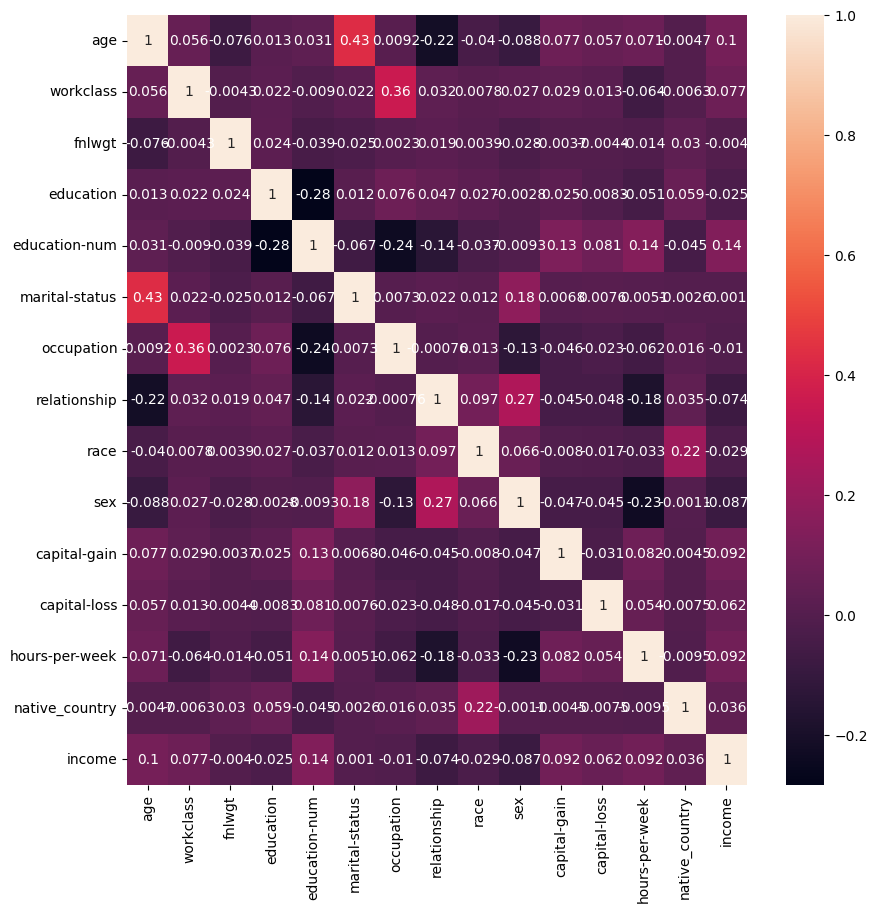

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(census_df.corr(), annot=True)

# Data Aggregation

## Age

In [ ]:
age_agg = category_df.groupby('age').agg({
  'fnlwgt': 'mean',
  'education-num': 'max',
  'capital-gain': 'max',
  'capital-loss': 'max',
  'hours-per-week': 'mean',
  'income': 'count'
})
age_agg

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,,,,,,
17,179157.852101,10,34095,1721,21.137815,595
18,193206.656214,14,34095,1721,25.764228,861
19,205094.159199,13,34095,2129,30.587226,1049
20,198157.824640,14,34095,2258,32.452338,1112
21,200142.544790,14,99999,2603,34.260512,1094
...,...,...,...,...,...,...
86,149912.000000,14,0,0,40.000000,1
87,110402.333333,9,0,0,7.000000,3
88,149540.666667,15,6418,1816,35.833333,6


## Workclass

In [ ]:
workclass_agg = category_df.groupby('workclass').agg({
  'fnlwgt': 'mean',
  'education-num': 'max',
  'capital-gain': 'max',
  'capital-loss': 'max',
  'hours-per-week': 'mean',
  'income': 'count'
})
workclass_agg

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
workclass,,,,,,
Federal-gov,183590.028631,16,99999,3683,41.513268,1432
Local-gov,190161.134885,16,99999,2467,40.847258,3136
Never-worked,215033.300000,10,0,0,28.900000,10
Private,192264.401767,16,99999,4356,39.630078,36678
Self-emp-inc,178872.700118,16,99999,2824,48.593270,1694
Self-emp-not-inc,175613.219373,16,99999,2824,44.396270,3861
State-gov,181933.464917,16,99999,3683,39.090863,1981
Without-pay,167902.666667,12,4416,1887,33.952381,21


## Education

In [ ]:
education_agg = category_df.groupby('education').agg({
  'fnlwgt': 'mean',
  'education-num': 'max',
  'capital-gain': 'max',
  'capital-loss': 'max',
  'hours-per-week': 'mean',
  'income': 'count'
})
education_agg

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
education,,,,,,
10th,196532.558675,6,99999,3770,36.986321,1389
11th,195102.272627,7,15024,2824,33.952539,1812
12th,197263.035061,8,18481,2258,35.413110,656
1st-4th,235339.110204,2,7688,2603,38.751020,245
5th-6th,229838.559055,3,99999,2603,38.891732,508
7th-8th,187752.355346,4,10566,3900,39.002096,954
9th,199006.851852,5,99999,2231,38.359788,756
Assoc-acdm,193700.075578,12,99999,2824,40.809494,1601
Assoc-voc,179420.665534,11,99999,3004,41.659223,2060


## Marital Status

In [ ]:
marital_status_agg = category_df.groupby('marital-status').agg({
  'fnlwgt': 'mean',
  'education-num': 'max',
  'capital-gain': 'max',
  'capital-loss': 'max',
  'hours-per-week': 'mean',
  'income': 'count'
})
marital_status_agg

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
marital-status,,,,,,
Divorced,184728.631674,16,99999,3900,41.115988,6630
Married-AF-spouse,184132.675676,16,99999,1651,39.810811,37
Married-civ-spouse,186815.806991,16,99999,2603,43.307661,22372
Married-spouse-absent,197523.157643,16,99999,3004,39.684713,628
Never-married,195440.619207,16,99999,3770,36.895515,16098
Separated,202974.111111,16,99999,3900,39.667974,1530
Widowed,175529.942688,16,99999,4356,33.438076,1518


## Occupation

In [ ]:
occupation_agg = category_df.groupby('occupation').agg({
  'fnlwgt': 'mean',
  'education-num': 'max',
  'capital-gain': 'max',
  'capital-loss': 'max',
  'hours-per-week': 'mean',
  'income': 'count'
})
occupation_agg

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
occupation,,,,,,
Adm-clerical,191904.265335,16,99999,3770,37.712197,5608
Armed-Forces,216972.600000,15,7298,1887,41.600000,15
Craft-repair,192320.266252,16,99999,3004,42.271164,6107
Exec-managerial,186153.437541,16,99999,4356,44.978632,6084
Farming-fishing,172524.914593,16,99999,2457,46.844654,1487
Handlers-cleaners,202034.153549,14,99999,3175,37.902945,2071
Machine-op-inspct,193190.163962,16,99999,3900,40.776747,3019
Other-service,187912.713560,16,99999,3770,34.754015,4919
Priv-house-serv,194470.341667,16,25236,3175,32.966667,240


## Relationship

In [ ]:
relationship_agg = category_df.groupby('relationship').agg({
  'fnlwgt': 'mean',
  'education-num': 'max',
  'capital-gain': 'max',
  'capital-loss': 'max',
  'hours-per-week': 'mean',
  'income': 'count'
})
relationship_agg

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
relationship,,,,,,
Husband,187222.099853,16,99999,2603,44.167183,19709
Not-in-family,190334.002387,16,99999,4356,40.530516,12567
Other-relative,203524.602258,16,41310,3683,37.128154,1506
Own-child,193756.483105,16,99999,3900,33.154567,7576
Unmarried,191381.556206,16,99999,4356,39.172326,5124
Wife,180748.781639,16,99999,2457,36.729730,2331


## Sex

In [ ]:
sex_agg = category_df.groupby('sex').agg({
  'fnlwgt': 'mean',
  'education-num': 'max',
  'capital-gain': 'max',
  'capital-loss': 'max',
  'hours-per-week': 'mean',
  'income': 'count'
})
sex_agg

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
sex,,,,,,
Female,185491.732172,16,99999,4356,36.403720,16182
Male,191738.905795,16,99999,3770,42.419264,32631


## Native Country

In [ ]:
native_country_agg = category_df.groupby('native_country').agg({
  'fnlwgt': 'mean',
  'education-num': 'max',
  'capital-gain': 'max',
  'capital-loss': 'max',
  'hours-per-week': 'mean',
  'income': 'count'
})
native_country_agg

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
native_country,,,,,,
Cambodia,200296.142857,13,13550,1977,42.035714,28
Canada,181262.406593,16,99999,2467,40.406593,182
China,172780.385246,16,99999,2415,38.262295,122
Columbia,217853.647059,16,3781,2042,39.929412,85
Cuba,240603.449275,16,15024,2001,40.101449,138
Dominican-Republic,203678.854369,14,99999,2258,41.621359,103
Ecuador,178576.777778,14,9386,0,39.266667,45
El-Salvador,250671.741935,16,20051,2339,36.361290,155
England,183573.094488,16,20051,2559,41.937008,127


In [ ]:
category_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
category_df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
category_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


creation of two dataframes for income

In [ ]:
less = category_df.query('income == "<=50K"')
greater = category_df.query('income == ">50K"')

In [ ]:
less[['income']]

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48836,<=50K
48837,<=50K
48838,<=50K
48839,<=50K


In [ ]:
greater

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48815,38,Private,149347,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
48816,43,Local-gov,23157,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,50,United-States,>50K
48822,40,Private,202168,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,55,United-States,>50K
48826,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K


# Usage of Seaborn Boxenplotting

<ipython-input-372-46834607748d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='age', y='hours-per-week', data=selected_age_df, palette = 'Paired')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '20'),
  Text(1, 0, '21'),
  Text(2, 0, '22'),
  Text(3, 0, '23'),
  Text(4, 0, '24'),
  Text(5, 0, '25'),
  Text(6, 0, '26'),
  Text(7, 0, '27'),
  Text(8, 0, '28'),
  Text(9, 0, '29'),
  Text(10, 0, '30'),
  Text(11, 0, '31'),
  Text(12, 0, '32'),
  Text(13, 0, '33'),
  Text(14, 0, '34'),
  Text(15, 0, '35'),
  Text(16, 0, '36'),
  Text(17, 0, '37'),
  Text(18, 0, '38'),
  Text(19, 0, '39'),
  Text(20, 0, '40')])

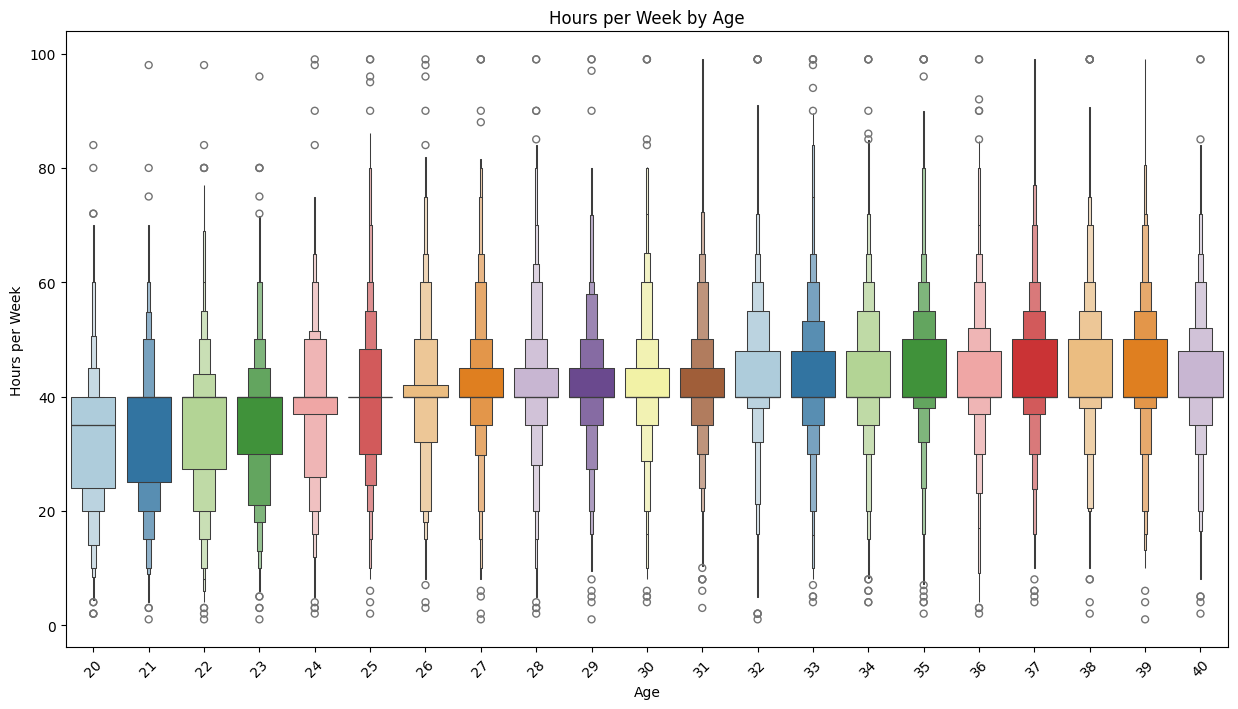

In [ ]:
selected_age_df = category_df.query('age >= 20 and age <= 40')
plt.figure(figsize=(15, 8))
sns.boxenplot(x='age', y='hours-per-week', data=selected_age_df, palette = 'Paired')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.title('Hours per Week by Age')
plt.xticks(rotation=45)

<ipython-input-451-ae948e49debe>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='occupation', y='hours-per-week', data=selected_occupation_df, palette = 'Set2')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Handlers-cleaners'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Transport-moving'),
  Text(8, 0, 'Farming-fishing'),
  Text(9, 0, 'Machine-op-inspct'),
  Text(10, 0, 'Tech-support'),
  Text(11, 0, 'Protective-serv'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

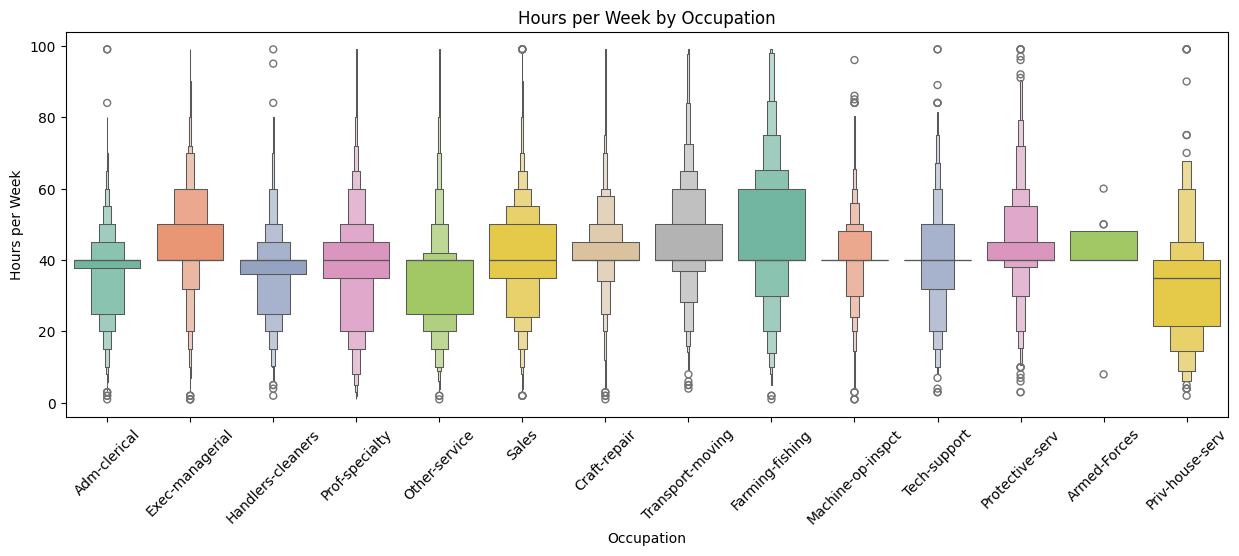

In [ ]:
selected_occupation_df = category_df[category_df['occupation'].isin(['Prof-specialty',
                                                                     'Craft-repair',
                                                                     'Exec-managerial',
                                                                     'Adm-clerical',
                                                                     'Sales',
                                                                     'Other-service',
                                                                     'Machine-op-inspct',
                                                                     'Transport-moving',
                                                                     'Handlers-cleaners',
                                                                     'Farming-fishing',
                                                                     'Tech-support',
                                                                     'Protective-serv',
                                                                     'Priv-house-serv',
                                                                     'Armed-Forces'])]
plt.figure(figsize=(15, 5))
sns.boxenplot(x='occupation', y='hours-per-week', data=selected_occupation_df, palette = 'Set2')
plt.suptitle('')
plt.xlabel('Occupation')
plt.ylabel('Hours per Week')
plt.title('Hours per Week by Occupation')
plt.xticks(rotation=45)

## Usage of pivot table to merge the two columns and onwards creating a bar graph for data visualization

<ipython-input-446-88e71c0452a4>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


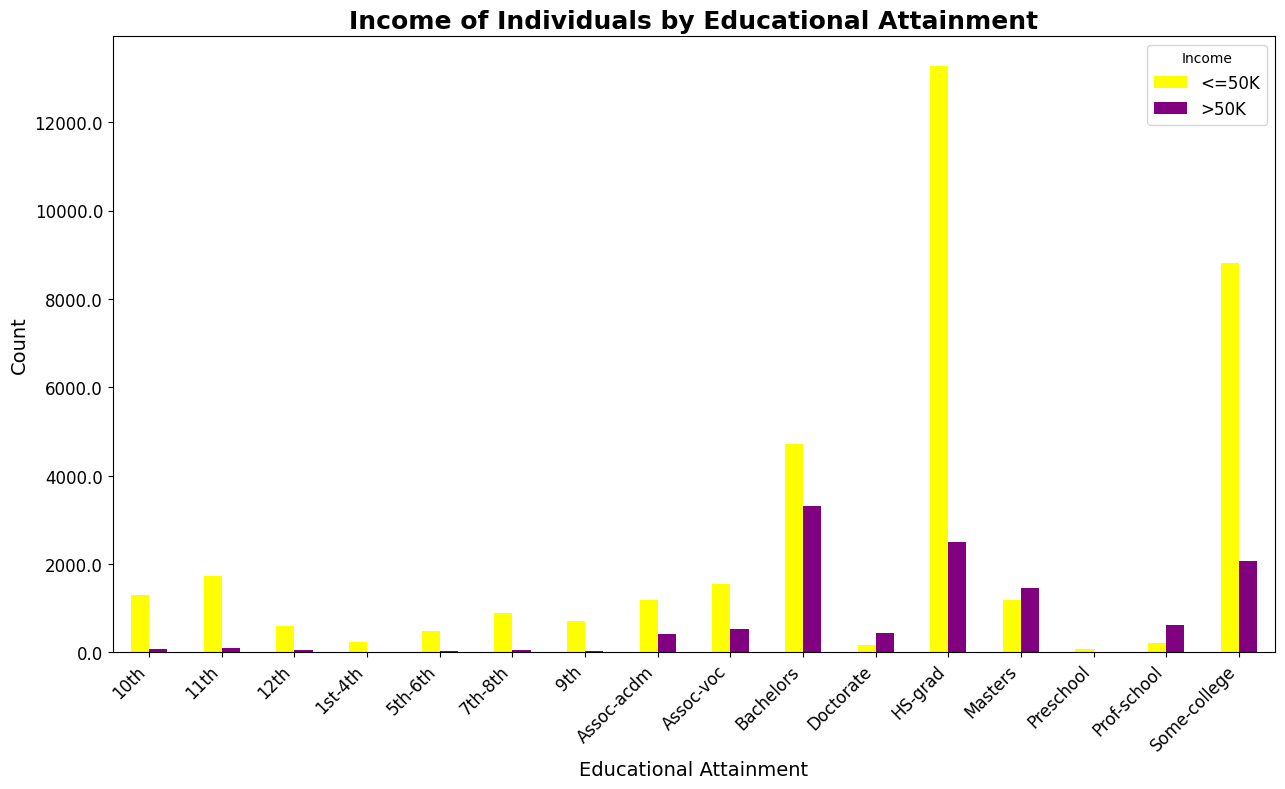

In [ ]:
pivot_table = category_df.pivot_table(index='education', columns='income', aggfunc='size', fill_value=0)
fig, ax = plt.subplots(figsize=(15, 8))
pivot_table.plot(kind='bar', ax=ax, color = ['yellow', 'purple'])
ax.set_title('Income of Individuals by Educational Attainment', fontsize=18, fontweight='bold')
ax.set_xlabel('Educational Attainment', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.legend(title='Income', fontsize=12)

<ipython-input-441-8492ce2c9264>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


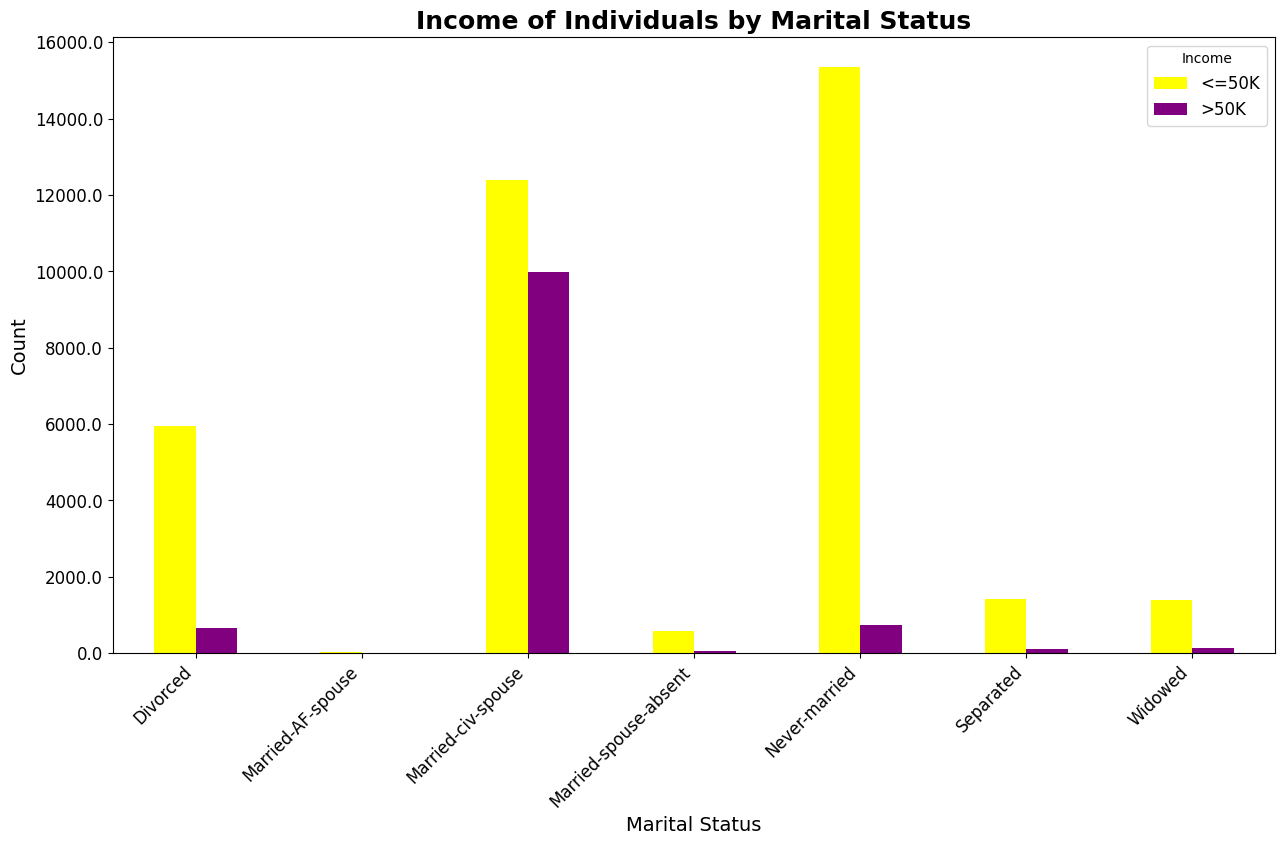

In [ ]:
pivot_table = category_df.pivot_table(index='marital-status', columns='income', aggfunc='size', fill_value=0)
fig, ax = plt.subplots(figsize=(15, 8))
pivot_table.plot(kind='bar', ax=ax, color = ['yellow', 'purple'])
ax.set_title('Income of Individuals by Marital Status', fontsize=18, fontweight='bold')
ax.set_xlabel('Marital Status', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.legend(title='Income', fontsize=12)

<ipython-input-447-6107974bf15f>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


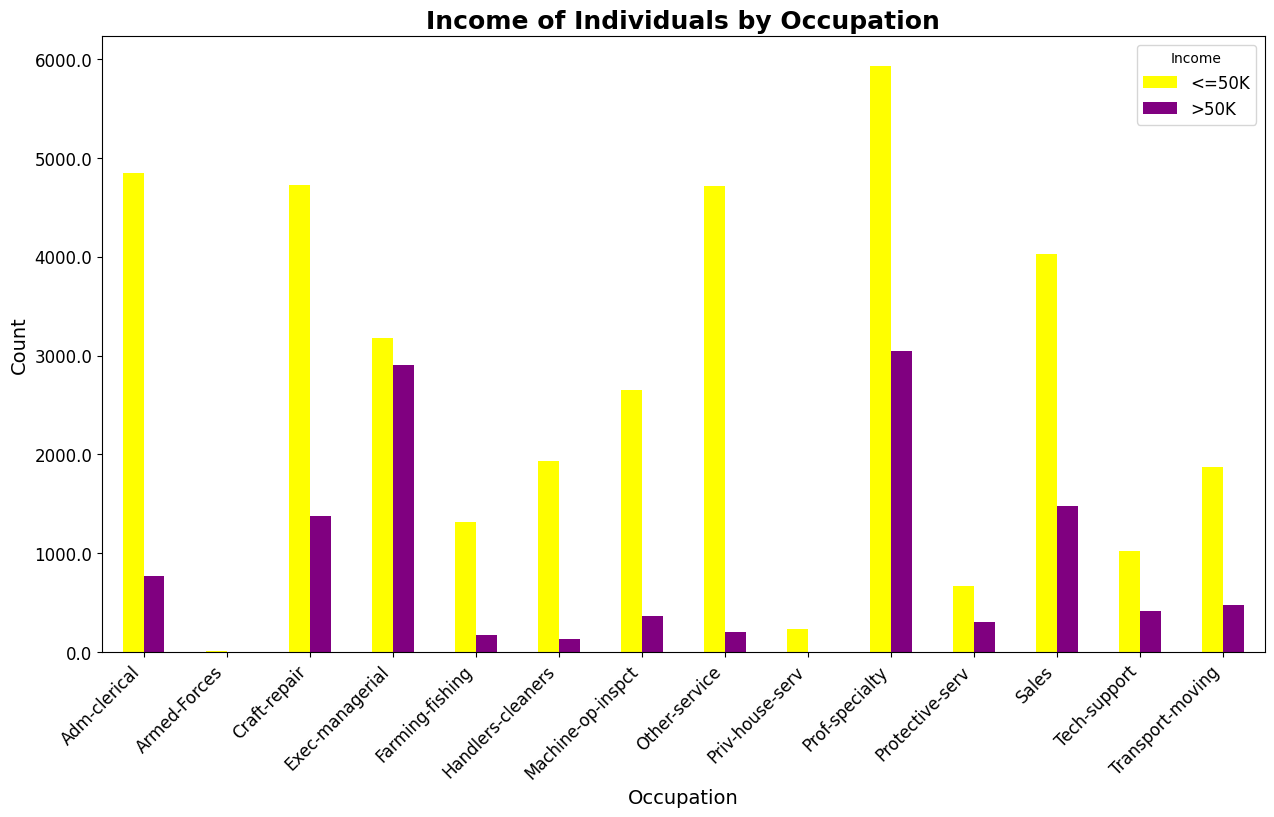

In [ ]:
pivot_table = category_df.pivot_table(index='occupation', columns='income', aggfunc='size', fill_value=0)
fig, ax = plt.subplots(figsize=(15, 8))
pivot_table.plot(kind='bar', ax=ax, color = ['yellow', 'purple'])
ax.set_title('Income of Individuals by Occupation', fontsize=18, fontweight='bold')
ax.set_xlabel('Occupation', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.legend(title='Income', fontsize=12)